In [1]:
import numpy as np
import csv
import pandas as pd

from collections import Counter
from numpy import linalg as LA

In [2]:
with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.data") as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append(newLine)

with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv", 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows(newLines)

In [3]:
# reading csv files
data =  pd.read_csv("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv",
                    names=["sequence_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "protein_local"])
print(data)

     sequence_name   mcg   gvh   alm   mit  erl  pox   vac   nuc protein_local
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22           MIT
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22           MIT
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22           MIT
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22           NUC
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22           MIT
...            ...   ...   ...   ...   ...  ...  ...   ...   ...           ...
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22           ME2
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47           NUC
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22           ME2
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39           NUC
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22           CYT

[1484 rows x 10 columns]


In [4]:
X = data.iloc[:, 1:9].values
y = data.iloc[:, 9].values

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

predict = neigh.predict(X)

accuracy_score(y,predict)

0.7311320754716981

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=5)

accuracy = []

for train_index, test_index in skf.split(X, y):

  parameter_k = []

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 23, test_size=0.2, stratify=y_train)

  for k in range(1,40,2):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    knn_predict = neigh.predict(X_val)

    parameter_k.append([accuracy_score(y_val, knn_predict),k])

  k = max(parameter_k)[1]
  print("Best k:",k)

  X_train = X[train_index]
  y_train = y[train_index]

  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)

  knn_predict = neigh.predict(X_test)

  accuracy.append(accuracy_score(y_test, knn_predict))

  print("accuracy: ",accuracy_score(y_test, knn_predict))
  
print("Mean accuracy: ",sum(accuracy)/len(accuracy))

Best k: 31
accuracy:  0.5824915824915825
Best k: 39
accuracy:  0.5925925925925926
Best k: 15
accuracy:  0.5892255892255892
Best k: 21
accuracy:  0.531986531986532
Best k: 17
accuracy:  0.5743243243243243
Mean accuracy:  0.5741241241241241


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=5)

k_list = [31,39,15,21,17]

mean_accuracy = []

for k in k_list:

  accuracy = []
  precision = []
  recall = []
  f_measure = []

  for train_index, test_index in skf.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    knn_predict = neigh.predict(X_test)

    accuracy.append(accuracy_score(y_test, knn_predict))
    precision.append(precision_score(y_test, knn_predict, average='macro',zero_division=0))
    recall.append(recall_score(y_test, knn_predict, average='macro',zero_division=0))
    f_measure.append(f1_score(y_test, knn_predict, average='macro',zero_division=0))

  print('\n')
  print(k)
  print("Mean accuracy: ",sum(accuracy)/len(accuracy), "Std: ",np.std(accuracy))
  print("Mean precision: ",sum(precision)/len(precision), "Std: ",np.std(precision))
  print("Mean recall: ",sum(recall)/len(recall), "Std: ",np.std(recall))
  print("Mean f_measure: ",sum(f_measure)/len(f_measure), "Std: ",np.std(f_measure))

  mean_accuracy.append([sum(accuracy)/len(accuracy),k])

print("\nMax accuracy: ",max(mean_accuracy)[0],"Parameter: ",max(mean_accuracy)[1])



31
Mean accuracy:  0.5734552734552735 Std:  0.03015910512767803
Mean precision:  0.449635069895406 Std:  0.055291662529861396
Mean recall:  0.417626922093734 Std:  0.00856349003962063
Mean f_measure:  0.41319598572402094 Std:  0.017202007110503383


39
Mean accuracy:  0.5660342160342161 Std:  0.026597551991655855
Mean precision:  0.4180020125588083 Std:  0.030955748786320077
Mean recall:  0.40814902370870987 Std:  0.015143264962877918
Mean f_measure:  0.39849322389512487 Std:  0.021161260492709284


15
Mean accuracy:  0.5741286741286742 Std:  0.026311341490176634
Mean precision:  0.579608673639736 Std:  0.04946268845084706
Mean recall:  0.5353784024523606 Std:  0.05243067010049686
Mean f_measure:  0.5400373840714984 Std:  0.04758446110080956


21
Mean accuracy:  0.5801961051961052 Std:  0.024942675499552966
Mean precision:  0.5124844688961346 Std:  0.035973505570685446
Mean recall:  0.46424405581221817 Std:  0.014090333071168937
Mean f_measure:  0.46937312124749136 Std:  0.0213079303

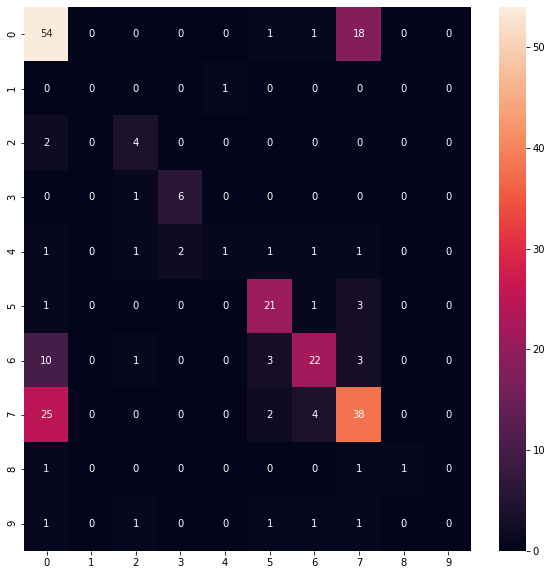

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 23, test_size=0.2, stratify=y_train)

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train, y_train)

knn_predict = neigh.predict(X_test)

cf_matrix = confusion_matrix(y_test, knn_predict)

sns.heatmap(cf_matrix, annot=True)

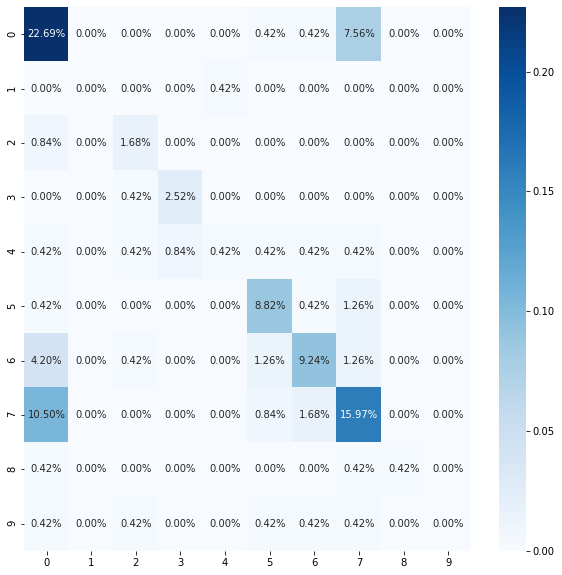

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')